In [1]:
pip install mne pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Extracting EDF parameters from C:\Users\N\Desktop\ASZED-153\ASZED\version_1.1\node_1\subset_1\subject_5\1\Phase 1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1999  =      0.000 ...     9.995 secs...

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1[1], Fp2[2], F3[3], F4[4], C3[5], C4[6], P3[7], P4[8], O1[9], ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2022-11-18 12:28:47 UTC
 nchan: 24
 projs: []
 sfreq: 200.0 Hz
 subject_info: <subject_info | his_id: SUBJECT_5_3, sex: 1, last_name: anonymous>
>


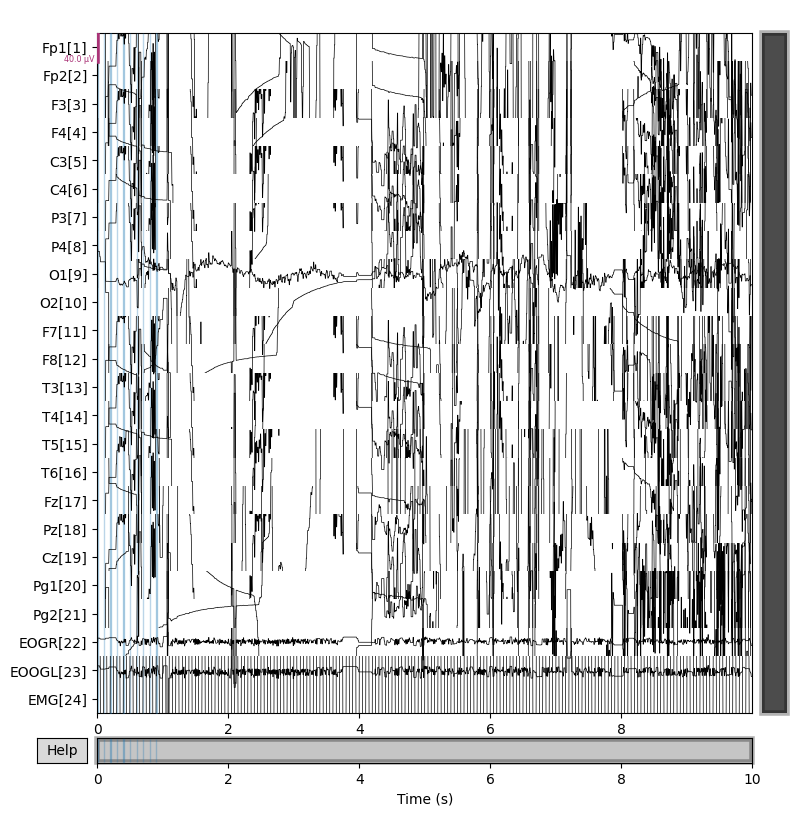

Potential flat channels: []


In [21]:
import mne

file_path = r"C:\Users\N\Desktop\ASZED-153\ASZED\version_1.1\node_1\subset_1\subject_5\1\Phase 1.edf"

raw = mne.io.read_raw_edf(file_path, preload=True)
print()
print(raw.info)
raw.plot(n_channels=100, duration=10)

import numpy as np

data = raw.get_data()
stds = np.std(data, axis=1)
flat_channels = [raw.ch_names[i] for i, std in enumerate(stds) if std < 1e-6]

print("Potential flat channels:", flat_channels)



Extracting EDF parameters from C:\Users\N\Desktop\ASZED-153\ASZED\version_1.1\node_1\subset_1\subject_2\1\Phase 1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5999  =      0.000 ...    59.990 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1[1], Fp2[2], F3[3], F4[4], C3[5], C4[6], P3[7], P4[8], O1[9], ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2022-10-26 11:57:28 UTC
 nchan: 24
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: SUBJECT_2_2, sex: 2, last_name: anonymous>
>


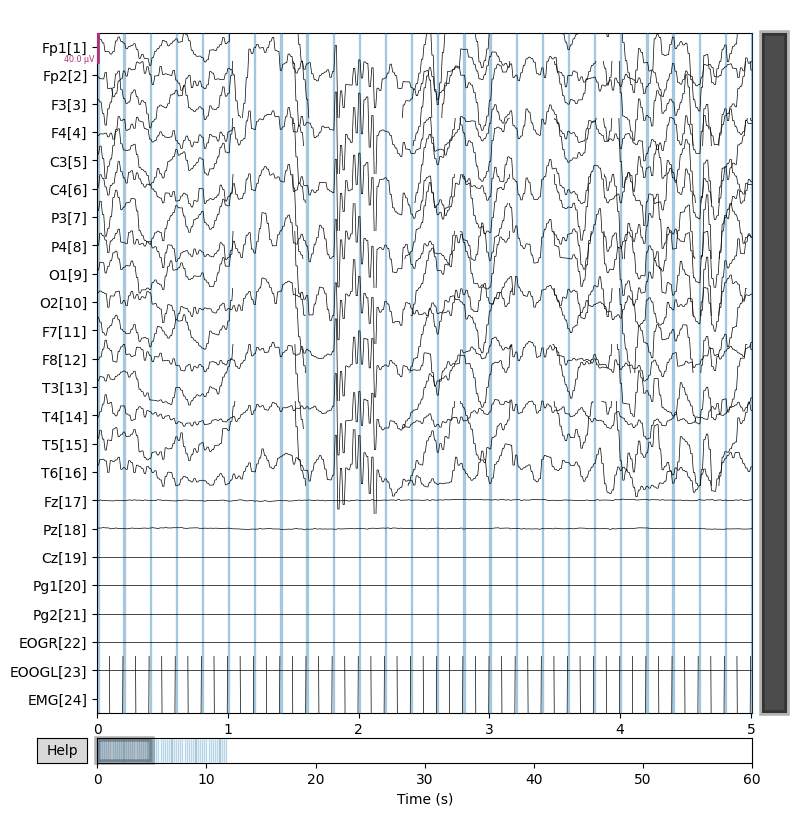

Potential flat channels: ['Fz[17]', 'Pz[18]', 'Cz[19]', 'Pg1[20]', 'Pg2[21]', 'EOGR[22]', 'EOOGL[23]']
['Fz[17]', 'Pz[18]', 'Cz[19]', 'Pg1[20]', 'Pg2[21]', 'EOGR[22]', 'EOOGL[23]']


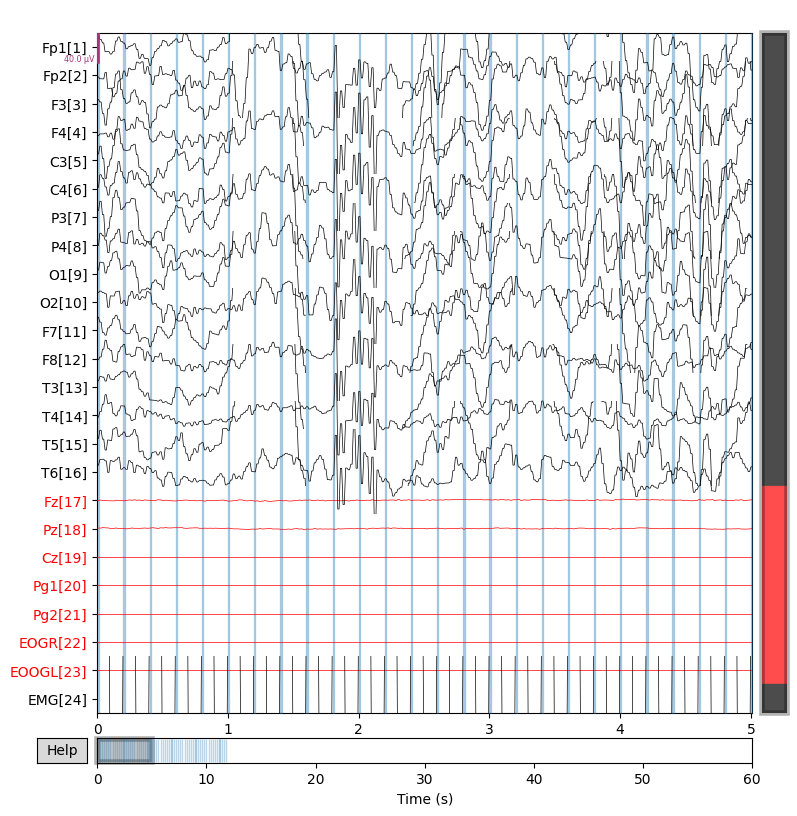

In [22]:
file_path = r"C:\Users\N\Desktop\ASZED-153\ASZED\version_1.1\node_1\subset_1\subject_2\1\Phase 1.edf"

# load the raw EEG
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.info['ch_names']
# check basic info
print(raw.info)
raw.plot(n_channels=24, duration=5)

import numpy as np

data = raw.get_data()
stds = np.std(data, axis=1)
flat_channels = [raw.ch_names[i] for i, std in enumerate(stds) if std < 1e-6]
print("Potential flat channels:", flat_channels)

# add flat channels to bads
raw.info['bads'].extend(flat_channels)
print(raw.info['bads'])

# plot again highlighting bad channels
raw.plot(n_channels=24, duration=5, bad_color='red');


In [14]:
events, event_id = mne.events_from_annotations(raw)
print(events[:10])
print(event_id)


Used Annotations descriptions: [np.str_(' ')]


[[  0   0   1]
 [ 20   0   1]
 [ 40   0   1]
 [ 60   0   1]
 [ 80   0   1]
 [100   0   1]
 [120   0   1]
 [140   0   1]
 [160   0   1]
 [180   0   1]]
{np.str_(' '): 1}


In [ ]:
import pandas as pd

metadata = pd.read_csv(r"C:\Users\N\Desktop\ASZED-153\ASZED_SpreadSheet.csv")
print(metadata.columns.tolist())
print(metadata.head())

# match sample with EDF filename
for i in range(21):
    sample_row = metadata.iloc[i]
    print(sample_row['sn'], sample_row['category'])
print()
sample_row = metadata.iloc[1]
print(sample_row['sn'], sample_row['category'])


['sn', 'age', 'gender', 'category', 'language', 'node']
          sn  age gender category language              node
0  subject_2   50      F  Patient   Yoruba  OAUTHC_IFE_ILESA
1  subject_3   45      F  Patient  English  OAUTHC_IFE_ILESA
2  subject_4   35      M  Patient  English  OAUTHC_IFE_ILESA
3  subject_5   28      M  Patient  English  OAUTHC_IFE_ILESA
4  subject_6   39      F  Patient  English  OAUTHC_IFE_ILESA
subject_2 Patient
subject_3 Patient
subject_4 Patient
subject_5 Patient
subject_6 Patient
subject_7 Patient
subject_8 Patient
subject_9 Patient
subject_10 Patient
subject_11 Control
subject_12 Control
subject_13 Control
subject_14 Patient
subject_15 Patient
subject_16 Patient
subject_17 Control
subject_18 Patient
subject_19 Control
subject_20 Patient
subject_21 Patient
subject_22 Patient

subject_3 Patient
